Please find below the Project for Recommendation Systems course. This is an individual assignment. Kindly submit it before it's deadline.<br>

Make new Product Recommendations<br>

Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.<br>

Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) ratings_Electronics_Ver3.tar.xz View in a new window (you may use winrar application to extract the .csv file)<br>

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.<br>

o The repository has several datasets. For this case study, please use the Electronics dataset.<br>
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.<br>
o The data set consists of:<br>
● 7,824,482 Ratings (1-5) for Electronics products.<br>
● Other metadata about products. Please see the description of the fields available on the web page cited above.<br>

o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating<br>
o Save these to a tab separated file. Name this file as product_ratings.csv.

Steps -<br>
1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)<br>
2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )<br>
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)<br>
4. Build Popularity Recommender model.<br>
5. Build Collaborative Filtering model.<br>
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)<br>
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.<br>
8. Summarise your insights.<br>

Mark Distributions -
Step - 1,2,3,8 - 5 marks each
Step - 4,5,6,7 - 10 marks each

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [2]:
ratings=pd.read_csv('ratings_Electronics.csv',header=None)
ratings.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
ratings.columns=['userID','productID','rating','reviewTime']
ratings.shape

(7824482, 4)

In [4]:
#dropping reviewTime
ratings=ratings.drop(columns=['reviewTime'])
ratings.head()

,userID,productID,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID       object
productID    object
rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


,rating,count,prop
0,5.0,4347541,0.555633
1,4.0,1485781,0.189889
2,1.0,901765,0.115249
3,3.0,633073,0.080909
4,2.0,456322,0.058320


<function matplotlib.pyplot.show(*args, **kw)>

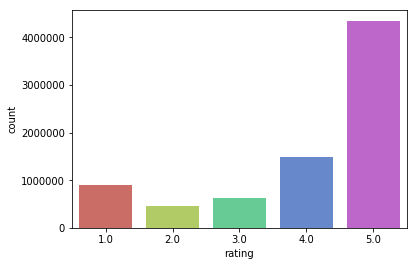

In [6]:
import seaborn as sns
from IPython.display import display
ratings_new=ratings
target_var='rating'

# ploting the data distribution for the target columns "class"
freq = ratings_new[target_var].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
display(freq)
sns.countplot(x=target_var,data=ratings_new,palette='hls')
plt.show

In [8]:
ratings_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userID,7824482,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productID,7824482,476002,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5


#### From the histogram and descptive stats, i can observe that
1) There are 42,01,696 unique reviewers. <br>
2) There are 4,76,002 unique products. <br>
3) Rating ranges from 1 to 5. <br>
4) Rating 4 and 5 are higher comparitive to other rating, however, each rating has comparivetly higher for analysis purpose.

### 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [12]:
review_50 = pd.DataFrame(ratings_new.userID.value_counts()>50)

In [14]:
review_50=review_50[review_50.userID==True]

In [15]:
ratings_new = pd.DataFrame(review_50.index,columns=["userID"])

In [16]:
print(ratings_new.head(), ratings_new.shape)

           userID
0   A5JLAU2ARJ0BO
1    ADLVFFE4VBT8
2  A3OXHLG6DIBRW8
3    A6FIAB28IS79
4   A680RUE1FDO8B (1466, 1)


In [17]:
data_set_50 = pd.merge(ratings_new,ratings,left_on='userID',right_on='userID',how='inner')

In [18]:
data_set_50.shape

(122171, 3)

In [19]:
data_set_50.head()

,userID,productID,rating
0,A5JLAU2ARJ0BO,1400532655,1.0
1,A5JLAU2ARJ0BO,B00003006R,5.0
2,A5JLAU2ARJ0BO,B00003G1RG,3.0
3,A5JLAU2ARJ0BO,B00004S9AK,5.0
4,A5JLAU2ARJ0BO,B00004SB92,4.0


In [20]:
data_set_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 0 to 122170
Data columns (total 3 columns):
userID       122171 non-null object
productID    122171 non-null object
rating       122171 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


In [21]:
data_set_50.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userID,122171,1466,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productID,122171,47155,B0088CJT4U,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,122171,NaN,NaN,NaN,4.26262,1.05883,1,4,5,5,5


In [22]:
data_set_50.isna().sum()

userID       0
productID    0
rating       0
dtype: int64

### There are 1,466 reviewers who have provided 50 or more number of ratings, ranging from 1 to 5 rating with 1,221,71 observations on 47,155 products.

In [23]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [24]:
data = Dataset.load_from_df(data_set_50[['userID', 'productID', 'rating']], reader)

In [25]:
data

In [26]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy
from surprise import Prediction
from surprise.model_selection import cross_validate

In [27]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.984390,11.461129,0.786501
KNNWithMeans,1.065774,0.286880,1.796043


### SVD algorithum gave best rmse, thus considered SVD for this project

### Spliting the dataset

In [28]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [29]:
type(trainset)

surprise.trainset.Trainset

In [ ]:
#    1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library
#    2) UserId and ItemId in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"
#    3) Methods are provided to convert rw id to inner id and vice verca

#### Training the model

In [30]:
#SVD
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [31]:
test_pred = svd_model.test(testset)

In [32]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [33]:
test_pred_df.head()

,0,1,2
0,A3QDMDSANPYGUX,B001W28L2Y,2.780046
1,A1X1CEGHTHMBL1,B00BZ7MALY,1.670690
2,AGR1V15L6FLMA,B002YIG9AQ,3.743767
3,ABDR6IJ93HFIO,B008HQ1M3I,4.262878
4,A3GVXKCTFN3YDN,B007W0XHK6,5.000000


In [34]:
test_pred_df.columns = ["userID","productID","rating"]
test_pred_df.sort_values(by = ["userID", "rating"],ascending=False,inplace=True)

In [35]:
test_pred_df.head()

,userID,productID,rating
733,AZOK5STV85FBJ,B000EDMPQK,4.262878
2176,AZOK5STV85FBJ,B00A85ANCW,4.262878
4133,AZOK5STV85FBJ,B003AXAAWW,4.262878
12107,AZOK5STV85FBJ,B000E922SA,4.262878
17323,AZOK5STV85FBJ,B000VS7XY2,4.262878


In [37]:
top_10_recos = test_pred_df.groupby("userID").head(10).reset_index(drop=True)

In [38]:
top_10_recos.head(30)

,userID,productID,rating
0,AZOK5STV85FBJ,B000EDMPQK,4.262878
1,AZOK5STV85FBJ,B00A85ANCW,4.262878
2,AZOK5STV85FBJ,B003AXAAWW,4.262878
3,AZOK5STV85FBJ,B000E922SA,4.262878
4,AZOK5STV85FBJ,B000VS7XY2,4.262878
5,AZOK5STV85FBJ,B001TH7GUU,3.695414
6,AZOK5STV85FBJ,B0002L5R78,1.791786
7,AZOK5STV85FBJ,B00005854B,1.447724
8,AZOK5STV85FBJ,B000XYYDYW,1.198033
9,AZOK5STV85FBJ,B0002BA570,1.000000


In [39]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.9881


1.9881194419133057